## This is a capstone project on supervised machine learning

### 1) Finding a suitable dataset

The dataset was collected from the Kaggle dataset library. The dataset's main goal is to predict whether a loan application will be approved or rejected based on particular features.

The loan approval dataset is a set of financial records and related data used to assess a person's or organization's suitability for a loan from a lending institution. It takes into account a number of variables, including the cibil score, income, employment situation, loan length, loan amount, asset worth, and loan status. 

Almost everyone in the country has already applied for a loan at least once, therefore it's critical to understand what criteria actually influence a loan application's outcome. 

The data set has 4269 rows with 13 columns, the lat column being the target variable.
Here is a link to access the data set and below are some codes to look at the data set.

[Loan status dataset: link](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/download?datasetVersionNumber=1)

#### Loan status dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [2]:
Loan_df=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Kaggle_Competitions/loan_approval_dataset.csv")

In [3]:
Loan_df.shape

(4269, 13)

In [4]:
Loan_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
Loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### 2) Data cleaning

NB: some column's names start with  blank space beofre the actul name of the column (exactly from "number of dependants column" to "loan_status". We are just going to remove the blank space to make it easier for the analysis when calling some columns 

In [7]:
for column in Loan_df.columns[1:]:
    Loan_df=Loan_df.rename(columns={column:column[1:]})

Let's have a look at the news column names

In [8]:
Loan_df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [9]:
# Number of numerical variables and number of categorical variables
non_numeric_columns = Loan_df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

numeric_columns = Loan_df.select_dtypes(['int64','int32']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['education', 'self_employed', 'loan_status'], dtype='object')
The number of non-numerical columns is 3
Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')
The number of numerical columns is 10


#### Missing values and outliers

In [10]:
Loan_df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

There is no missing value, Because the target is categorical we, can't reallt focused on the presence of some outliers in the target variable.

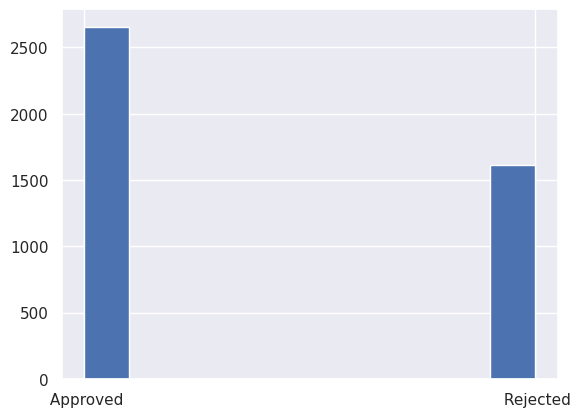

In [46]:
plt.hist(Loan_df.loan_status)
plt.savefig('histogram.png')
plt.show()

### 3) Data eploration

#### Between target variables and numerics features

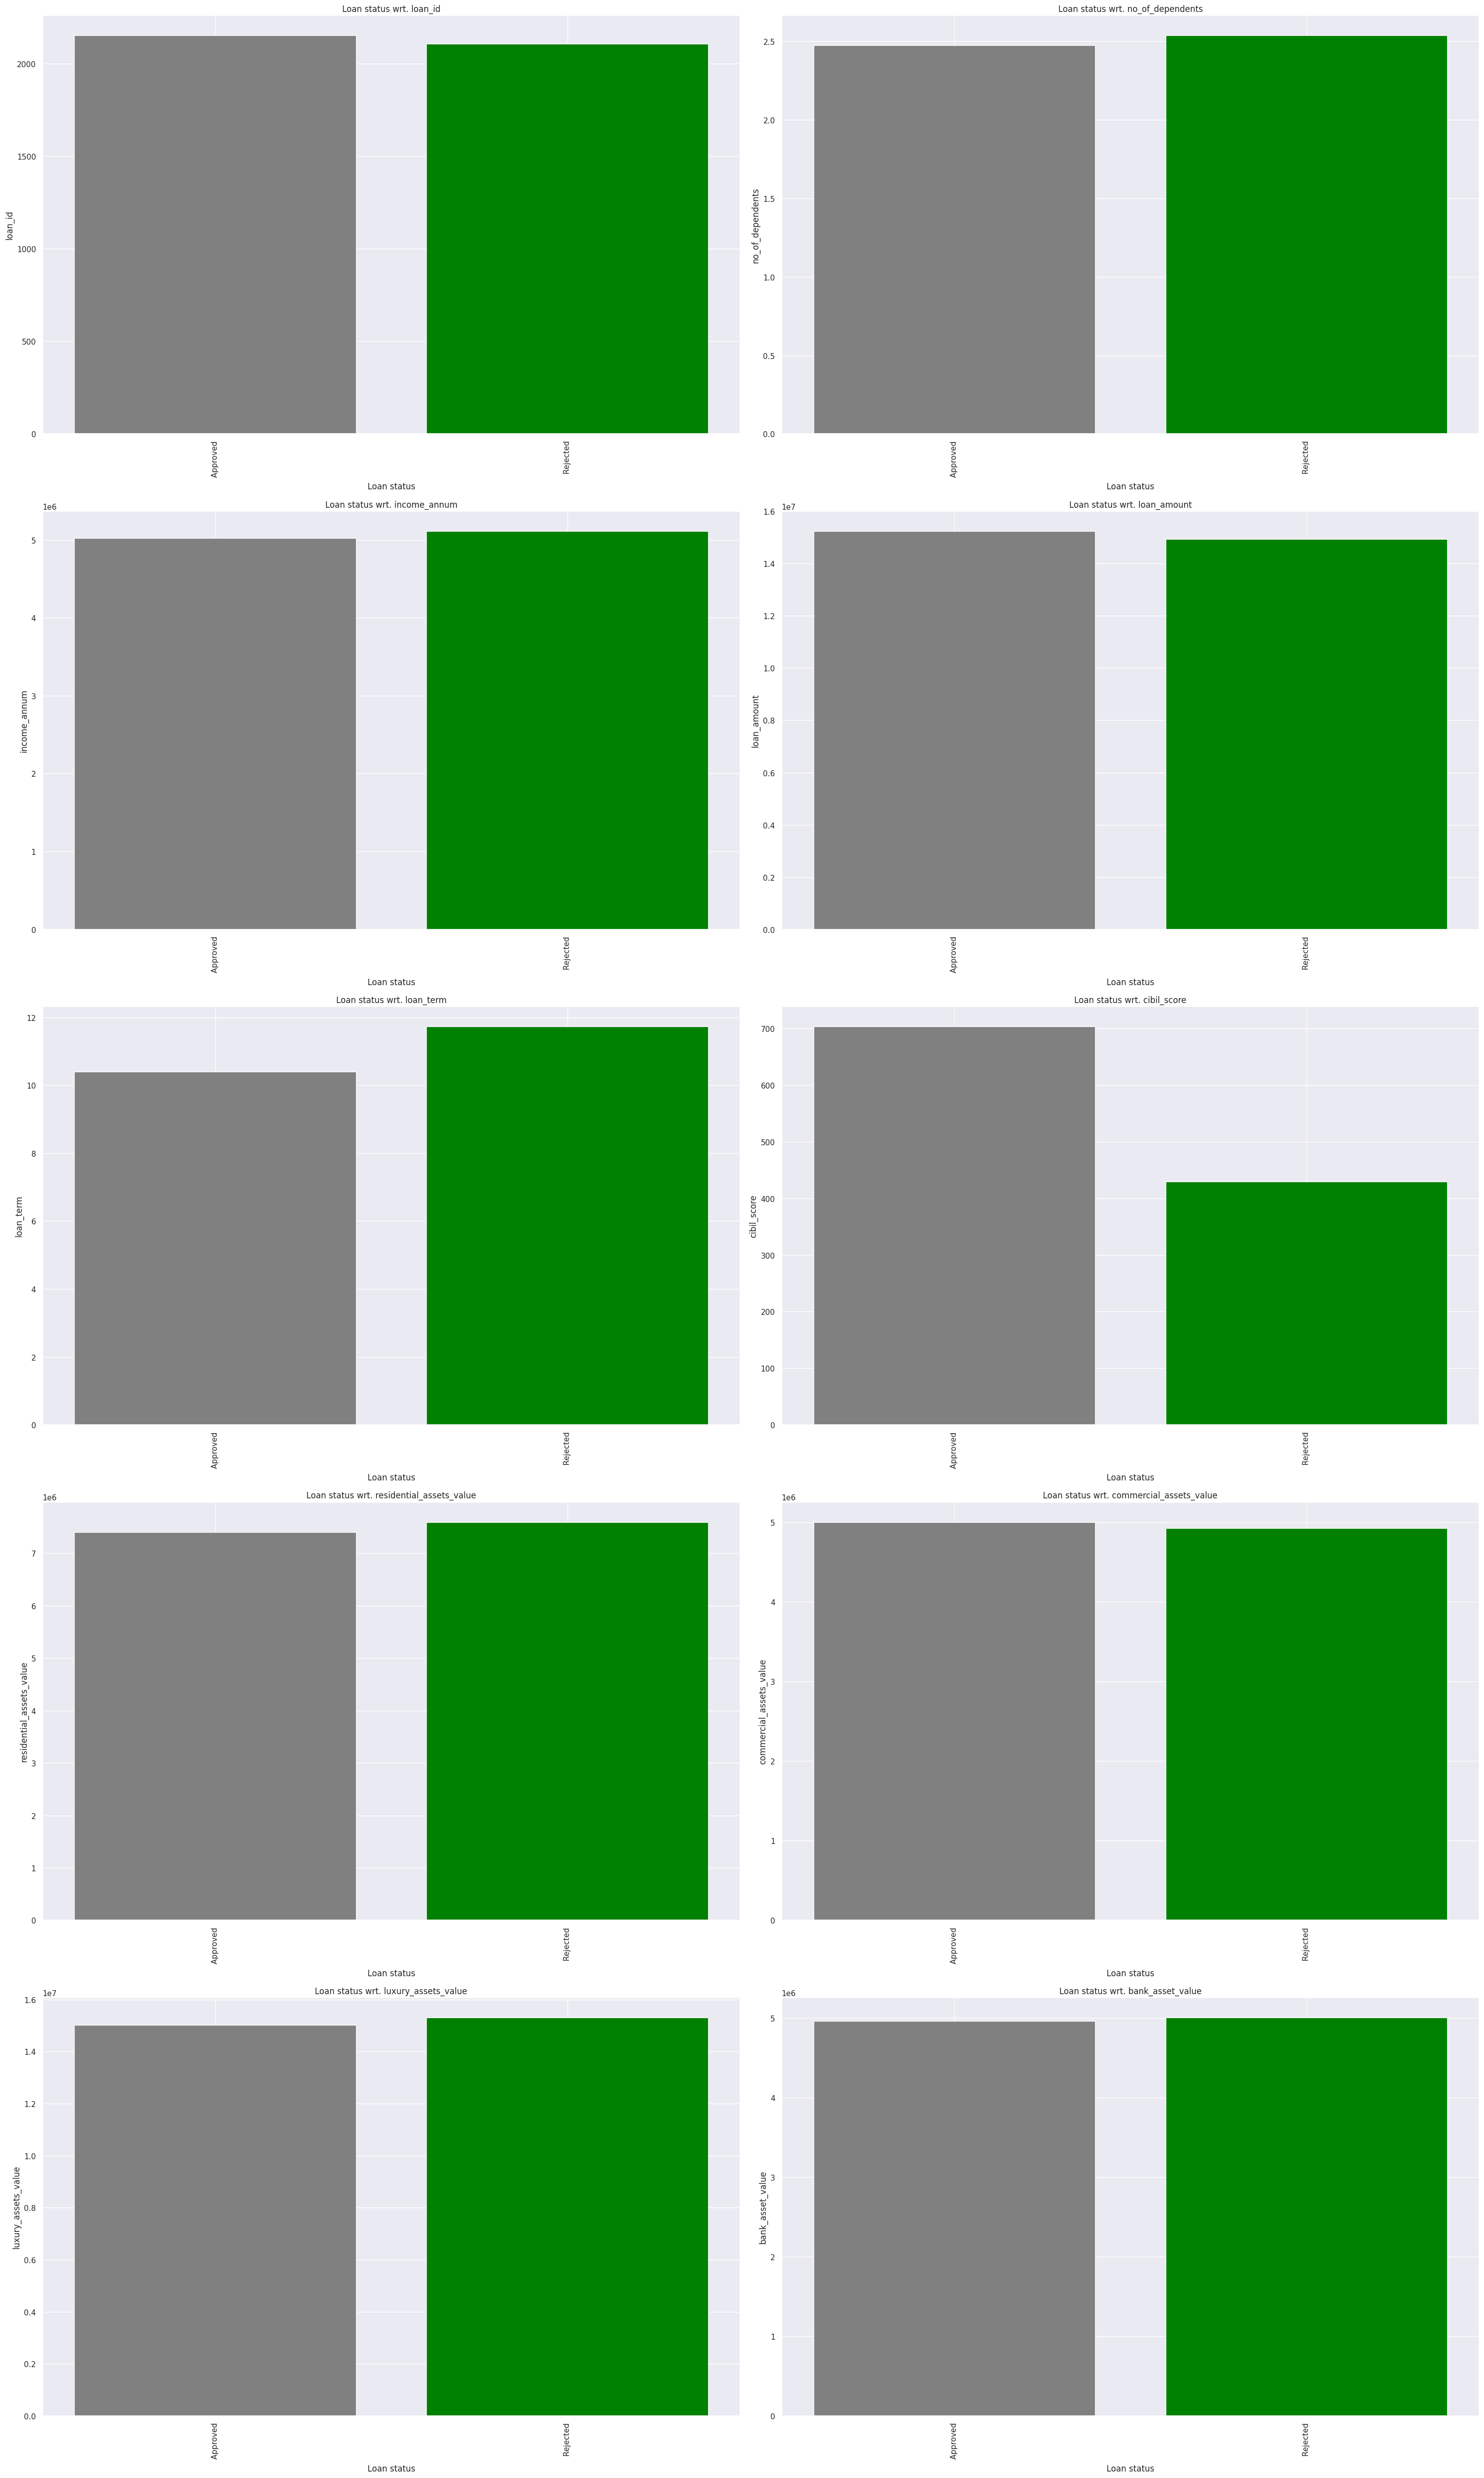

In [12]:
plt.figure(figsize=(30,50))

for index, column in enumerate(numeric_columns):
    plt.subplot(5,2,index+1)
    plt.bar(Loan_df.groupby("loan_status")[column].mean().index, Loan_df.groupby("loan_status")[column].mean(),
           color=("grey","green"))
    plt.title("Loan status wrt. {}".format(column))
    plt.ylabel(column)
    plt.xlabel('Loan status')
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


Only two numerical variables really show some varaibility in the output: They are "cibil_score" and "loan_tern"

#### Between target variables and non numerics features

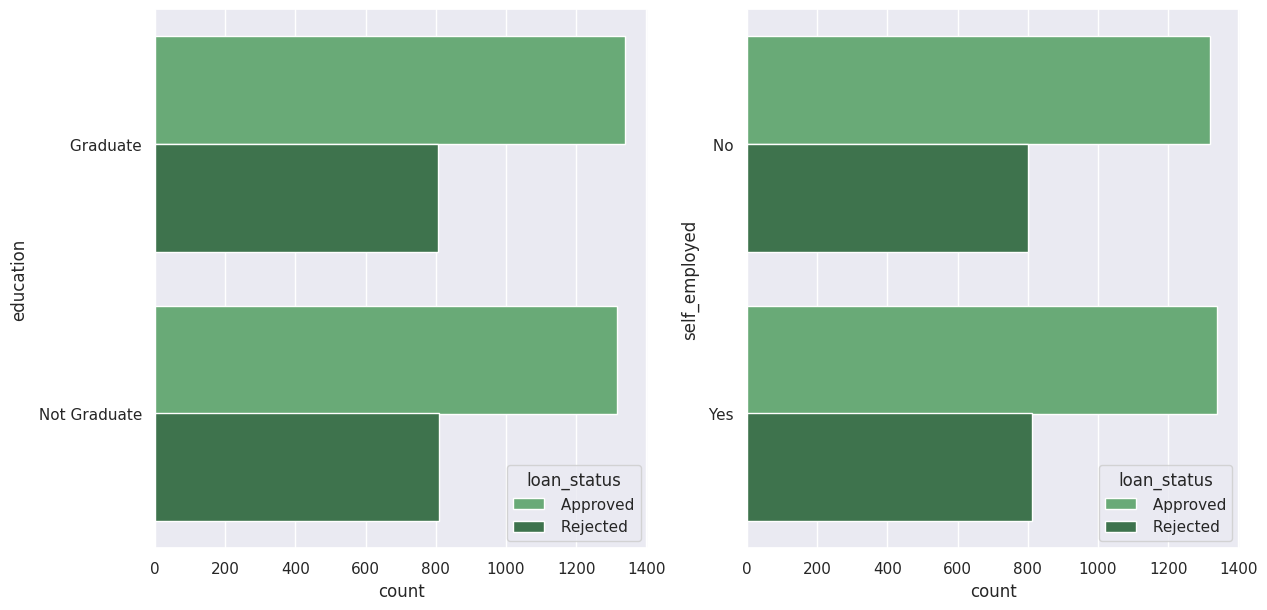

In [13]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.countplot(y="education", hue="loan_status", data=Loan_df, palette="Greens_d")


plt.subplot(1,2,2)
sns.countplot(y="self_employed", hue="loan_status", data=Loan_df, palette="Greens_d")
plt.show()

There is no really much difference in terms of varaibility. As we can see, being a graduate or not does not really affcet the loan application status, the same for being employed or not.

Let's see among the numeics variables,how many are correlated each other

In [14]:
Loan_df.corr()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


### Feature engineering 

As from now, only two variables are relevant in determining the loan status of a potentiel borrower. Let continue out analysis with more data visualization and to finally determine two most importnt features.

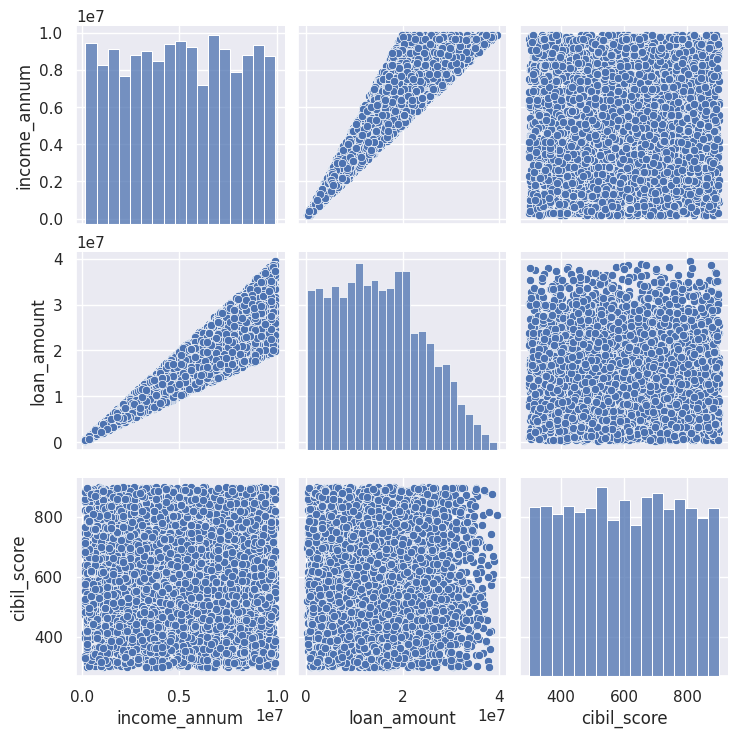

In [15]:
sns.pairplot(Loan_df[["income_annum","loan_amount","cibil_score"]])

How does loan amount affect loan status?

<AxesSubplot:xlabel='loan_status', ylabel='loan_amount'>

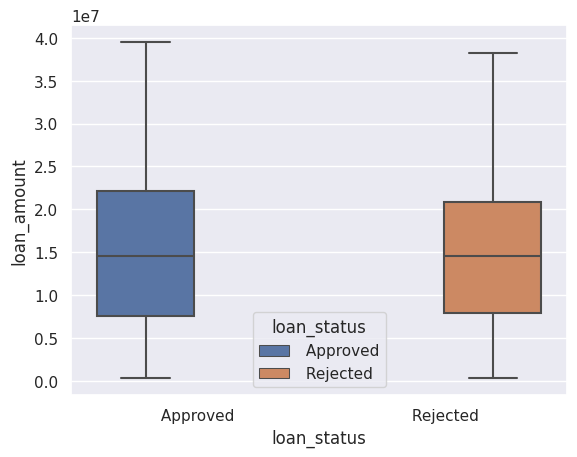

In [16]:
sns.boxplot(x=Loan_df.loan_status, y=Loan_df.loan_amount, hue=Loan_df.loan_status)

how does loan amount and credit score  together affect loan status?

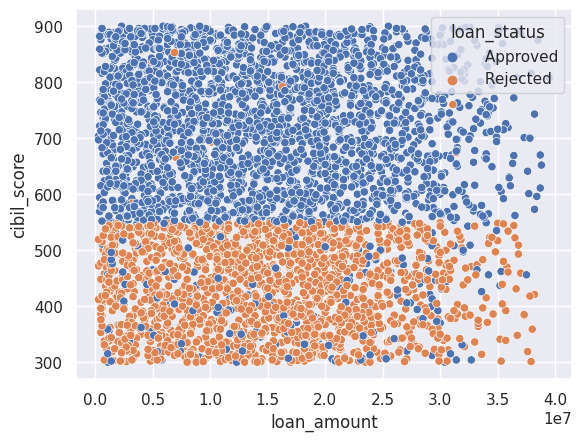

In [17]:
sns.scatterplot(x="loan_amount", y="cibil_score", hue="loan_status", data=Loan_df);

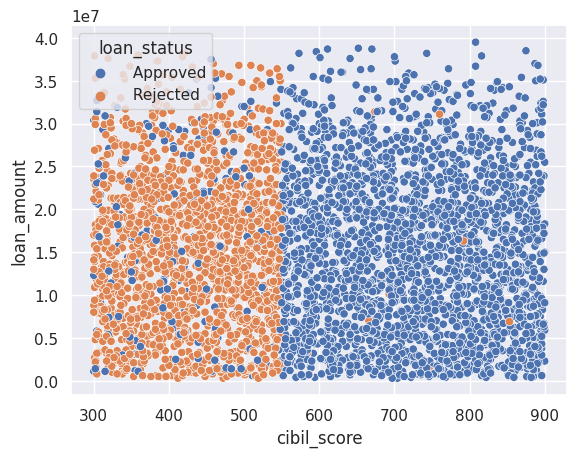

In [18]:
sns.scatterplot(y="loan_amount", x="cibil_score", hue="loan_status", data=Loan_df);

We can see that, no matter what amount is, as long as the credit score is greater than arount 600, the loan is going to be approved by the lender institution (except for a few cases). It further shows the importance of credit score to determine the loan status.

What about income annual?

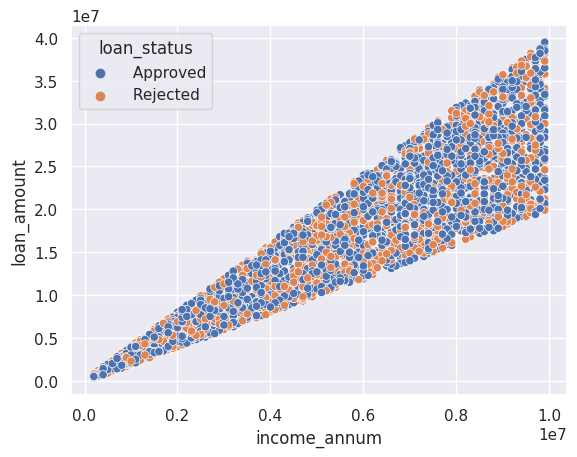

In [19]:
sns.scatterplot( x="income_annum",y="loan_amount", hue="loan_status", data=Loan_df);

How does  loan status depends on the credit score alone?

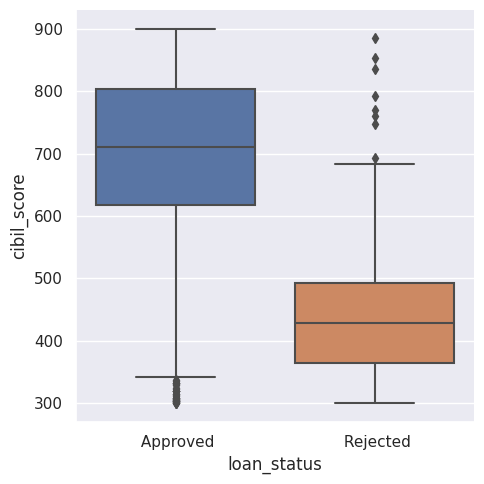

In [20]:
sns.catplot(data=Loan_df, x="loan_status", y="cibil_score", kind="box")

Does this change something if the person is employed or not?

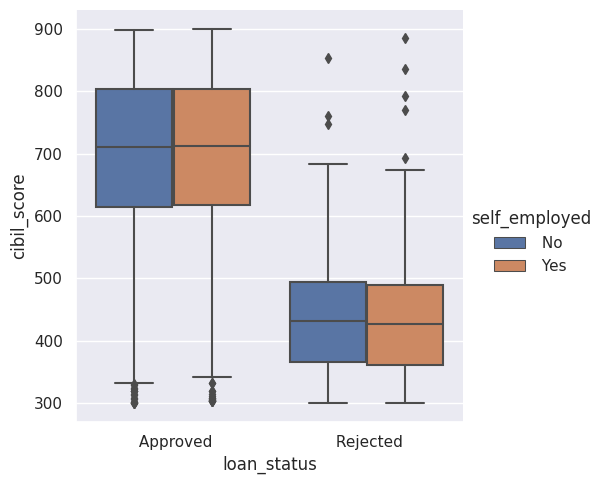

In [21]:
sns.catplot(data=Loan_df, x="loan_status", y="cibil_score", hue="self_employed", kind="box")

How do Loan status and loan amount affcte loan status?

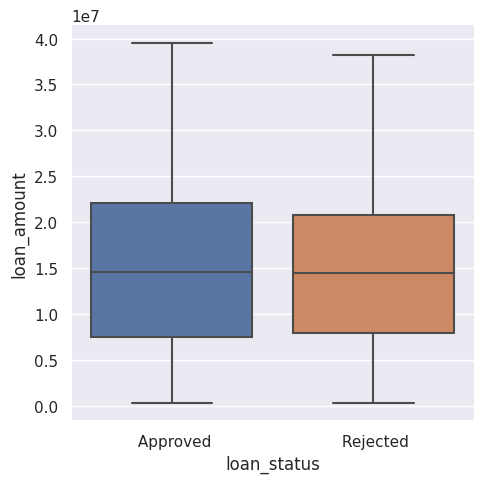

In [22]:
sns.catplot(data=Loan_df, x="loan_status", y="loan_amount", kind="box")

In [23]:
# what happend when we add the credit score of the person?
d2=Loan_df.copy()
L=[]
for i in d2.cibil_score:
    if i<600:
        L+=['less_than_600']
    else:
        L+=["greater_than_600"]

In [24]:
d2["credit_status"]=L

Does number of dependants affect loan status?

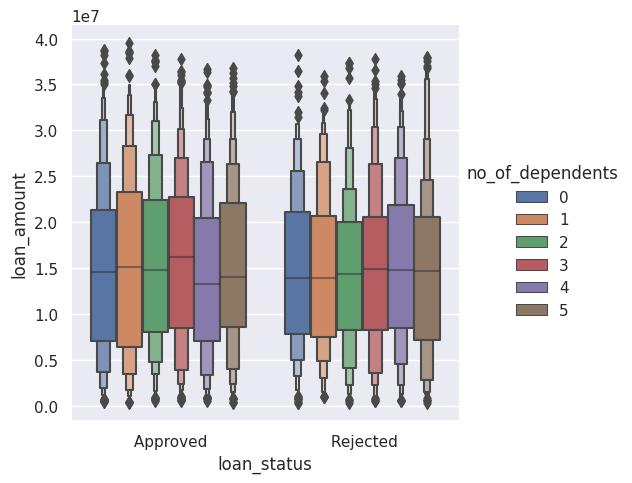

In [25]:
sns.catplot(data=Loan_df, x="loan_status", y="loan_amount",hue="no_of_dependents",kind="boxen")

what about loan term?

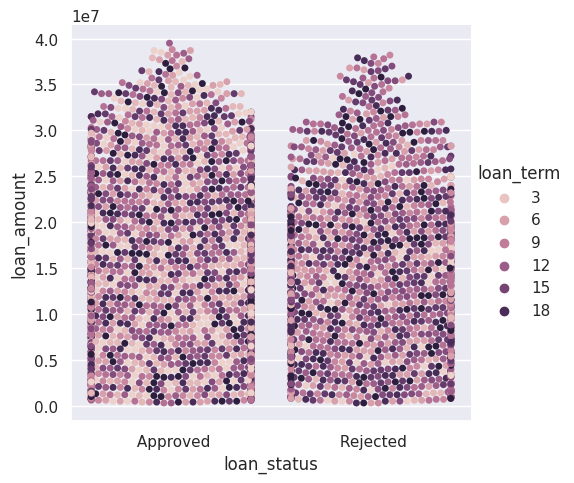

In [26]:
sns.catplot(data=Loan_df, x="loan_status", y="loan_amount",hue="loan_term",kind="swarm")

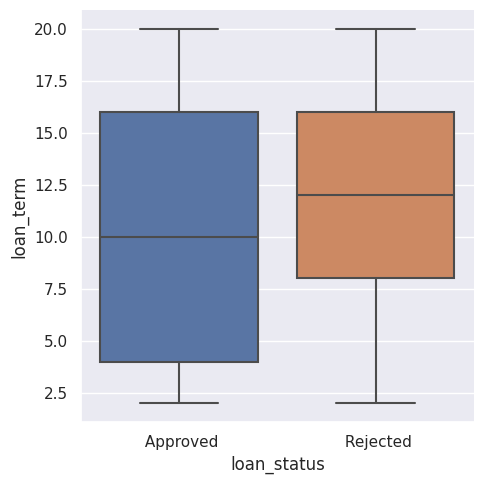

In [27]:
sns.catplot(data=Loan_df, x="loan_status", y="loan_term", kind="box")

We see some variabiity

### Before we move on to the model implementation, we do need to change the target variable for it to take numeric values. 

In [28]:
target=pd.get_dummies(Loan_df.loan_status, prefix="loan_status")

In [29]:
target.columns

Index(['loan_status_ Approved', 'loan_status_ Rejected'], dtype='object')

In [30]:
target=target.rename(columns={'loan_status_ Approved':'Approved'})

### Models

After doing all these EDA steps, we will first create our models with only the two most important variables which are "cibil score" and "loan term"
see how il will perform on the models.

We will implement support vector machines, randon forest, and gradient boosting and KNN and compare the performances on the models.

In [31]:
# Importing important libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.svm import SVC
from sklearn import tree, ensemble
%matplotlib inline

In [32]:
# splitting the data into training set and test set
X=Loan_df[["cibil_score","loan_term"]]
y=target.Approved
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#### Tuning weighted KNN with number of neighbors equals 5

In [33]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
score_knn = cross_val_score(knn, X_train, y_train, scoring='r2', cv=5)

In [34]:
print("knn accuracy on training set is",score_knn.mean())

knn accuracy on training set is 0.7918989624839728


#### SVM

In [35]:
svc=SVC()
svc.fit(X_train,y_train)
score_svm=cross_val_score(svc, X_train, y_train, cv=5)
print("svm accuracy on training set is",score_svm.mean())

svm accuracy on training set is 0.9487554904831625


#### Random Forest

In [36]:
rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)
rfc.fit(X_train,y_train)
score_rfc=cross_val_score(rfc, X_train, y_train, cv=5)
print("rfc accuracy on training set is",score_rfc.mean())

rfc accuracy on training set is 0.9522693997071743


#### Gradient Boostinng 

In [37]:
params = {'n_estimators': 10,
          'max_depth': 2,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
score_boosting=cross_val_score(clf, X_train, y_train, cv=5)
print("clf accuracy on training set is",score_boosting.mean())

clf accuracy on training set is 0.9569546120058566


Gradient Boosting perfrom slighty better than random forest and SVM  on the training set and way better than KNN.
We will be uisng Gradient boosting algorithm to validate the model on the test set.

In [38]:
import itertools 
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
predict_test = clf.predict(X_test)

Normalized confusion matrix


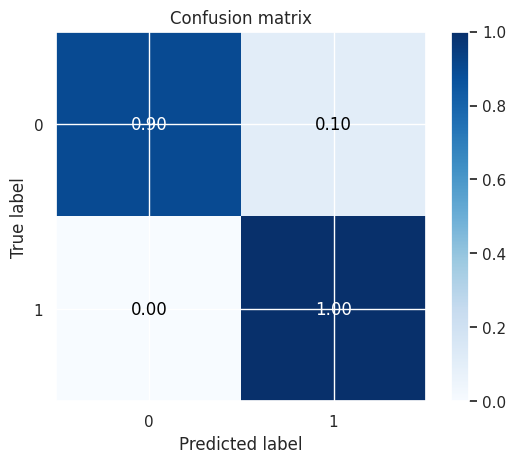

In [47]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)
plt.savefig('conf')

#### Calculate Metrics
Print the F1, F beta, precision, recall and accuracy scores.

In [41]:
accuracy = accuracy_score(y_test, predict_test)
precision = precision_score(y_test, predict_test)
recall = recall_score(y_test, predict_test)
f1 = f1_score(y_test, predict_test)
fbeta_precision = fbeta_score(y_test, predict_test, beta=0.5)
fbeta_recall = fbeta_score(y_test, predict_test, beta=2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.96
Precision score: 0.94
Recall score: 1.00
F1 score: 0.97
Fbeta score favoring precision: 0.95
FBeta score favoring recall: 0.99


 With an overall great performance, gradient boosting performs very well on the test data.

#### Tuning hyperparameters: can gradient boosting perform better?

In [42]:
params = {'n_estimators': 7,
          'max_depth': 2,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
score_boosting=cross_val_score(clf, X_train, y_train, cv=5)
print("clf accuracy on training set is",score_boosting.mean())

clf accuracy on training set is 0.9569546120058566


we changed the vlaues of the number of trees used and the max_depth so mny times. it seems like the accuracy of 0.957 seems to be the highest one.